In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

<details>
<summary><h3>Описание полей</h3></summary>

- order_tk – Идентификатор заказа (поездки)
- party_rk_id – Идентификатор клиента
- minute_cost – Стоимость минуты (в условных денежных единицах)
- hold_amount – Размер суммы, которая замораживается на счете в момент взятия самоката
- transport_model – Название модели самоката
- distance_km – Километраж поездки
- created_dttm – Дата и время создания заказа
- book_start_dttm — Дата и время начала поездки
- book_end_dttm — Дата и время завершения поездки
- book_time_zone_cd — Часовой пояс
- local_book_start_dttm — Дата и время начала поездки в часовом поясе клиента
- nominal_price_rub_amt — Стоимость поездки (в условных денежных единицах)
- loyalty_accrual_rub_amt — Размер выплаченного кешбэка в рублях
- loyalty_accrual_bns_amt — Размер выплаченного кешбэка в бонусах (если оплата была кредитной картой)
- Gender_cd — Пол клиента
</details>

<details>
<summary>Age – Возраст клиента</summary>
Просто числовое значение возраста в годах
</details>

<details>
<summary> Education_level – Уровень образования</summary>
<div style="margin-left: 15px">
SCH — начальное, среднее<br>
GRD — высшее<br>
UGR — неполное высшее<br>
PGR — два высших<br>
ACD — ученая степень
</div>
</details>

<details>
<summary> marital_status_cd – Семейный статус</summary>
<div style="margin-left: 15px">
IMR — незарегистрированный брак<br>
MAR — женат/замужем<br>
DUV — не проживает с супругом(ой)<br>
OMR — зарегистрированный брак<br>
CIV — гражданский брак<br>
UNM — холост/не замужем<br>
DIV — разведен(а)<br>
FAL — никогда не состоял(а) в браке<br>
WID — вдовец/вдова
</div>
</details>

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
pd.set_option('display.max_columns', 40)
pd.set_option('display.float_format', '{:.2f}'.format)

In [9]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/kicksharing (1).csv')
# df = pd.read_csv('kicksharing.csv')
df  # 396749 строчек

,order_rk,party_rk,gender_cd,age,education_level_cd,marital_status_cd,lvn_state_nm,minute_cost,activation_cost,hold_amount,transport_model,distance_km,created_dttm,book_start_dttm,book_end_dttm,book_time_zone_cd,local_book_start_dttm,nominal_price_rub_amt,loyalty_accrual_rub_amt,loyalty_accrual_bns_amt
0,266071307,761067705,M,40,UGR,DIV,ТЮМЕНСКАЯ ОБЛ,4.99,30.00,300.00,SL,3.69,2024-08-07 09:47:25.000000,2024-08-07 09:47:29.325252,2024-08-07 10:07:59.339524,5,2024-08-07 11:47:29.325252,134.79,19.48,NaN
1,355113920,614049469,F,30,GRD,MAR,РОСТОВСКАЯ ОБЛ,8.49,50.00,300.00,SL,1.11,2024-10-17 14:57:20.000000,2024-10-17 14:57:24.586000,2024-10-17 15:04:19.419607,3,2024-10-17 14:57:24.586000,109.43,40.30,NaN
2,347424551,757583701,M,28,UGR,UNM,СВЕРДЛОВСКАЯ ОБЛ,5.99,30.00,300.00,E,1.52,2024-09-19 05:31:41.000000,2024-09-19 05:34:59.476000,2024-09-19 05:41:50.164372,5,2024-09-19 07:34:59.476000,71.93,10.79,NaN
3,351562959,541367366,M,24,GRD,UNM,Г МОСКВА,8.99,50.00,300.00,SL,0.50,2024-10-04 16:05:09.000000,2024-10-04 16:05:13.162000,2024-10-04 16:07:31.724918,3,2024-10-04 16:05:13.162000,76.97,7.70,NaN
4,258647149,238473615,M,34,NaN,NaN,Г МОСКВА,6.99,50.00,300.00,SL,2.60,2024-07-10 06:57:40.000000,2024-07-10 06:57:43.017125,2024-07-10 07:07:48.446462,3,2024-07-10 06:57:43.017125,126.89,25.38,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396744,349109813,755778419,M,18,NaN,NaN,СВЕРДЛОВСКАЯ ОБЛ,6.49,30.00,300.00,E,1.56,2024-09-25 11:39:42.000000,2024-09-25 11:39:46.885000,2024-09-25 11:45:41.545313,5,2024-09-25 13:39:46.885000,68.94,6.89,NaN
396745,348829245,1146263947,M,23,NaN,NaN,КАЛИНИНГРАДСКАЯ ОБЛ,8.99,30.00,300.00,Max,2.27,2024-09-24 20:05:43.000000,2024-09-24 20:05:46.954000,2024-09-24 20:13:58.592279,2,2024-09-24 19:05:46.954000,110.91,13.09,NaN
396746,273529251,1012601147,M,20,NaN,NaN,ТЮМЕНСКАЯ ОБЛ,8.79,50.00,300.00,E,1.41,2024-09-03 16:07:43.000000,2024-09-03 16:07:45.311487,2024-09-03 16:28:07.510118,3,2024-09-03 16:07:45.311487,234.59,234.59,NaN
396747,306062051,863877659,M,19,NaN,NaN,Г САНКТ-ПЕТЕРБУРГ,7.49,50.00,300.00,SL,1.00,2024-09-12 18:28:48.000000,2024-09-12 18:28:50.401000,2024-09-12 18:32:22.911827,3,2024-09-12 18:28:50.401000,79.96,79.96,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396749 entries, 0 to 396748
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   order_rk                 396749 non-null  int64  
 1   party_rk                 396749 non-null  int64  
 2   gender_cd                393828 non-null  object 
 3   age                      396749 non-null  int64  
 4   education_level_cd       190059 non-null  object 
 5   marital_status_cd        217729 non-null  object 
 6   lvn_state_nm             362572 non-null  object 
 7   minute_cost              396749 non-null  float64
 8   activation_cost          396749 non-null  float64
 9   hold_amount              396749 non-null  float64
 10  transport_model          396749 non-null  object 
 11  distance_km              396749 non-null  float64
 12  created_dttm             396749 non-null  object 
 13  book_start_dttm          396749 non-null  object 
 14  book

In [11]:
len(df[df['loyalty_accrual_rub_amt'].notna() & df['loyalty_accrual_bns_amt'].notna()])

4

Создадим столбец с суммарным кэшбеком, полученным пользователем за поездку (если значения обоих кэшбеков NaN, то можно считать, что эти пользователи не получили кэшбек, это несущественное предположение, так как таких пользователей лишь малая доля от общего числа клиентов).

Всего 4 человека получили кэшбек одновременно рублями и бонусами (возможно частично оплатили дебетовой картой, частично кредитной)

Также сделаем колонку с типом гендера численной (заменим "male" на 1, "female" на 0), с месяцем, когда клиент начал поездку (с учетом его часового пояса), с переменной, принимающей значение "1" если человек поехал на самокате (проехал не 0 км) и принимающей значение "0" в случае, если по каким-то причинам человек оплатил и начал поездку, но не проехал хоть сколько-то. Еще добавим день недели поездк, время поездки в минутах.

Удалим строки без типа гендера, они имеют небольшую долю (около 0,7%, вместе с тем, тип гендера достаточно важен для анализа данных).

In [12]:
df = df[pd.notna(df['gender_cd'])]

def coalesce(column):
    return column if pd.notna(column) else 0

df['cashback_total'] = df['loyalty_accrual_rub_amt'].apply(coalesce) + df['loyalty_accrual_bns_amt'].apply(coalesce)
df['cashback_total']

df['gender_cd'] = df['gender_cd'].replace('M', 1).replace('F', 0)
df['gender_cd'] = df[pd.notna(df['gender_cd'])]['gender_cd']

df['month'] = pd.to_datetime(df['local_book_start_dttm']).dt.month
df['weekday'] = pd.to_datetime(df['local_book_start_dttm']).dt.weekday + 1  # пн - 1, вс - 7
df['started_journey'] = df['distance_km'].apply(lambda x: 1 if x > 0 else 0)
df['duration'] = (pd.to_datetime(df['book_end_dttm']) - pd.to_datetime(df['book_start_dttm'])).dt.total_seconds() / 60

age_bins = [0, 16, 25, 45, 65, float('inf')]
age_labels = ['Дети', 'Юноши', 'Молодые взрослые', 'Зрелые взрослые', 'Пожилые']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

df

,order_rk,party_rk,gender_cd,age,education_level_cd,marital_status_cd,lvn_state_nm,minute_cost,activation_cost,hold_amount,transport_model,distance_km,created_dttm,book_start_dttm,book_end_dttm,book_time_zone_cd,local_book_start_dttm,nominal_price_rub_amt,loyalty_accrual_rub_amt,loyalty_accrual_bns_amt,cashback_total,month,weekday,started_journey,duration,age_group
0,266071307,761067705,1,40,UGR,DIV,ТЮМЕНСКАЯ ОБЛ,4.99,30.00,300.00,SL,3.69,2024-08-07 09:47:25.000000,2024-08-07 09:47:29.325252,2024-08-07 10:07:59.339524,5,2024-08-07 11:47:29.325252,134.79,19.48,NaN,19.48,8,3,1,20.50,Молодые взрослые
1,355113920,614049469,0,30,GRD,MAR,РОСТОВСКАЯ ОБЛ,8.49,50.00,300.00,SL,1.11,2024-10-17 14:57:20.000000,2024-10-17 14:57:24.586000,2024-10-17 15:04:19.419607,3,2024-10-17 14:57:24.586000,109.43,40.30,NaN,40.30,10,4,1,6.91,Молодые взрослые
2,347424551,757583701,1,28,UGR,UNM,СВЕРДЛОВСКАЯ ОБЛ,5.99,30.00,300.00,E,1.52,2024-09-19 05:31:41.000000,2024-09-19 05:34:59.476000,2024-09-19 05:41:50.164372,5,2024-09-19 07:34:59.476000,71.93,10.79,NaN,10.79,9,4,1,6.84,Молодые взрослые
3,351562959,541367366,1,24,GRD,UNM,Г МОСКВА,8.99,50.00,300.00,SL,0.50,2024-10-04 16:05:09.000000,2024-10-04 16:05:13.162000,2024-10-04 16:07:31.724918,3,2024-10-04 16:05:13.162000,76.97,7.70,NaN,7.70,10,5,1,2.31,Юноши
4,258647149,238473615,1,34,NaN,NaN,Г МОСКВА,6.99,50.00,300.00,SL,2.60,2024-07-10 06:57:40.000000,2024-07-10 06:57:43.017125,2024-07-10 07:07:48.446462,3,2024-07-10 06:57:43.017125,126.89,25.38,NaN,25.38,7,3,1,10.09,Молодые взрослые
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396744,349109813,755778419,1,18,NaN,NaN,СВЕРДЛОВСКАЯ ОБЛ,6.49,30.00,300.00,E,1.56,2024-09-25 11:39:42.000000,2024-09-25 11:39:46.885000,2024-09-25 11:45:41.545313,5,2024-09-25 13:39:46.885000,68.94,6.89,NaN,6.89,9,3,1,5.91,Юноши
396745,348829245,1146263947,1,23,NaN,NaN,КАЛИНИНГРАДСКАЯ ОБЛ,8.99,30.00,300.00,Max,2.27,2024-09-24 20:05:43.000000,2024-09-24 20:05:46.954000,2024-09-24 20:13:58.592279,2,2024-09-24 19:05:46.954000,110.91,13.09,NaN,13.09,9,2,1,8.19,Юноши
396746,273529251,1012601147,1,20,NaN,NaN,ТЮМЕНСКАЯ ОБЛ,8.79,50.00,300.00,E,1.41,2024-09-03 16:07:43.000000,2024-09-03 16:07:45.311487,2024-09-03 16:28:07.510118,3,2024-09-03 16:07:45.311487,234.59,234.59,NaN,234.59,9,2,1,20.37,Юноши
396747,306062051,863877659,1,19,NaN,NaN,Г САНКТ-ПЕТЕРБУРГ,7.49,50.00,300.00,SL,1.00,2024-09-12 18:28:48.000000,2024-09-12 18:28:50.401000,2024-09-12 18:32:22.911827,3,2024-09-12 18:28:50.401000,79.96,79.96,NaN,79.96,9,4,1,3.54,Юноши


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_rk,393828.00,289225584.70,38133042.42,252611203.00,261815119.75,270436677.50,343267799.25,356252786.00
party_rk,393828.00,595719536.02,330048224.45,14717.00,294801205.00,609972445.00,863066755.00,1301075452.00
gender_cd,393828.00,0.85,0.36,0.00,1.00,1.00,1.00,1.00
age,393828.00,31.57,9.44,12.00,24.00,31.00,37.00,94.00
minute_cost,393828.00,7.29,1.29,1.50,6.49,7.49,8.22,19.99
activation_cost,393828.00,42.59,11.99,0.00,30.00,50.00,50.00,50.00
hold_amount,393828.00,299.98,1.95,80.00,300.00,300.00,300.00,500.00
distance_km,393828.00,3.69,142.39,0.00,0.94,1.73,3.07,56012.64
book_time_zone_cd,393828.00,3.54,1.21,0.00,3.00,3.00,3.00,12.00
nominal_price_rub_amt,393828.00,127.72,100.20,0.00,80.94,103.94,142.35,5627.64


Посмотрим на возможные значения некоторых переменных и попробуем определить выбросы:

1) hold_amount - принимает всего 3 значения, причем лишь 1 раз принимает значение "500", в данной поездке не наблюдается других нетипичных значений переменных, поэтому можно убрать ее из датасета. Также значение "80" принимается лишь 30 раз (менее 0.01% от общего числа поездок), но эти значения есть лишь у поездок с транспортной моделью "Lucky" (таких поездок около 60), поэтому пока что их удалять не будем.

In [14]:
df['hold_amount'].value_counts()

,count
hold_amount,
300.00,393797
80.00,30
500.00,1


In [15]:
print(df[df['hold_amount'] == 80]['transport_model'].apply(lambda x: True if x == 'Lucky' else False).all())  # У всех таких поездок модель Lucky
print(f'Поездок с моделью Lucky: {len(df[df["transport_model"]=="Lucky"])}')

True
Поездок с моделью Lucky: 62


2) distance_km & cashback - сразу можем сказать, что есть выбросы (скорее ошибки), например есть пользователи со 56000 км пройденной дистанцией, с 55000 кэшбека или с отрицательным кешбеком.

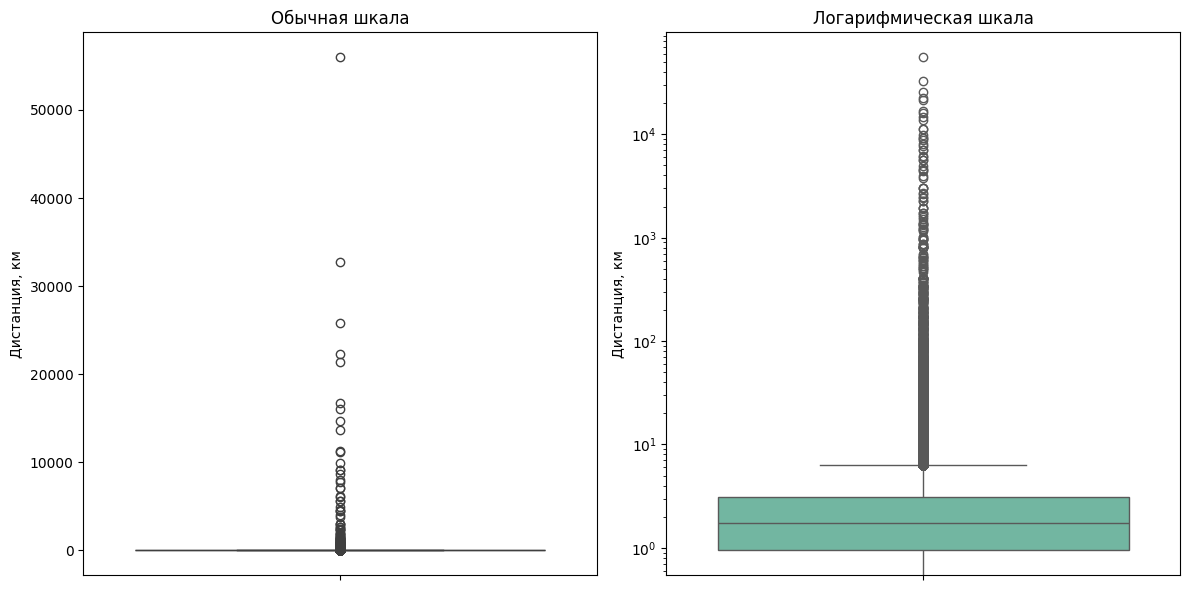

99% значений пройденной дистанции не превышают 13.746 км


In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(y=df['distance_km'], ax=ax1)
ax1.set_title('Обычная шкала')
ax1.set_ylabel('Дистанция, км')

sns.boxplot(y=df['distance_km'], ax=ax2, palette="Set2")
ax2.set_yscale('log')
ax2.set_title('Логарифмическая шкала')
ax2.set_ylabel('Дистанция, км')
plt.tight_layout()
plt.show()

distance_quan = np.quantile(df["distance_km"].to_list(), 0.99)
print(f'99% значений пройденной дистанции не превышают {distance_quan:.3f} км')

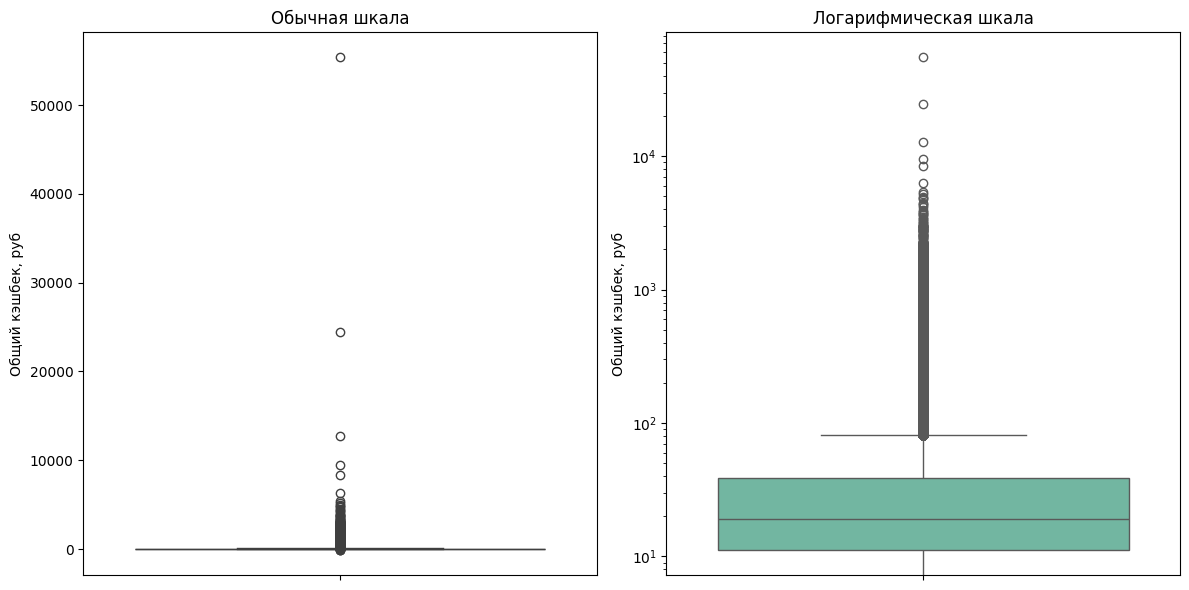

99% значений общего кэшбека не превышают 379.560 рублей


In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(y=df['cashback_total'], ax=ax1)
ax1.set_title('Обычная шкала')
ax1.set_ylabel('Общий кэшбек, руб')

sns.boxplot(y=df['cashback_total'], ax=ax2, palette="Set2")
ax2.set_yscale('log')
ax2.set_title('Логарифмическая шкала')
ax2.set_ylabel('Общий кэшбек, руб')
plt.tight_layout()
plt.show()

cashback_quan = np.quantile(df["cashback_total"].to_list(), 0.99)
print(f'99% значений общего кэшбека не превышают {cashback_quan:.3f} рублей')

Избавим базу данных от выбросов - поездки, попавшие в вехний 1% по пройденной дистанции или начисленному кэшбеку.

3) nominal_price_rub_amt - после того как избавились от поездок с подозрительно длинной дистанцией корректно рассчитанные цены должны принимать значения в относительно небольшом интервале (в случае экстремально больших значений дистанции даже корректно рассчитанные цены принимали бы экстремальные значения, завышая среднее и прочие параметры).

Ярко выраженных выбросов действительно нет. Однако, учитывая, что 99,9% цен не превышают 724 рубля, значения выше 1000 вызывают подозрения, для того, чтобы избавится от потенциальных ошибочных значений уберем топ 0,1% поездок с самой высокой ценой поездки
После очистим датасет от выбросов цен - уберем строки, входящие в топ 1% самых высоких цен или имеющих цену поездки 0 рублей (таких поездок более 1%). Очистку по ценам сделаем после очистки по дистанции, так как выбросы дистанции могли сильно завысить цену, даже корректно рассчитываемую, а нужно избавится от объектов с вероятно некорректно рассчитанной ценой.

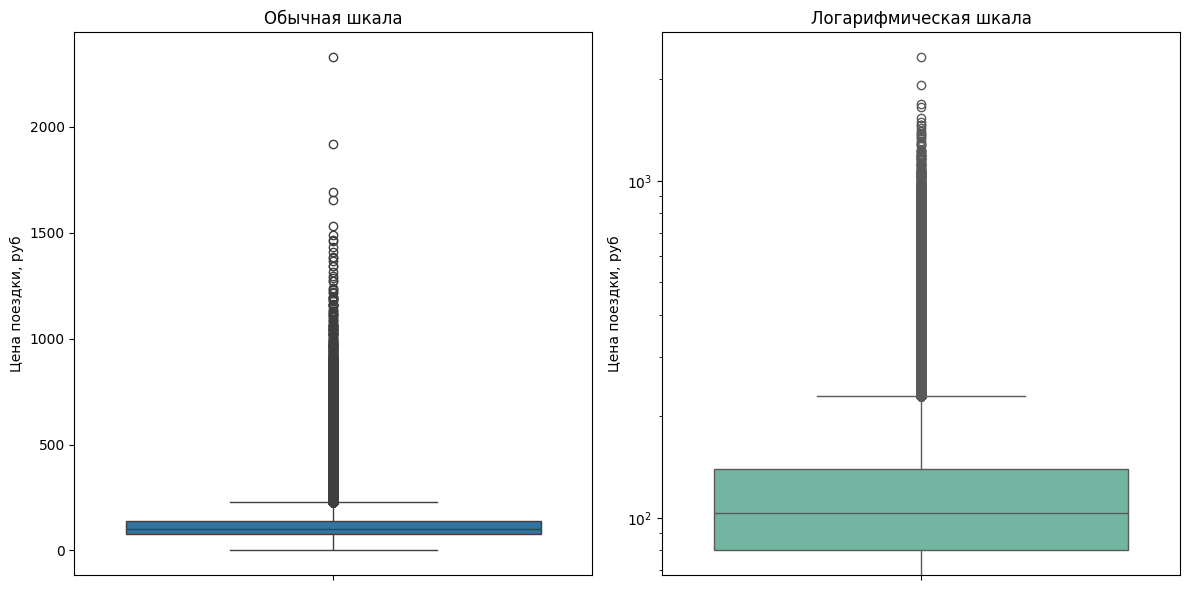

99.9% значений цен поездки не превышают 724.100 руб


In [18]:
df = df[df['cashback_total'] <= cashback_quan][df['cashback_total'] >= 0.0][df['distance_km'] <= distance_quan]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(y=df['nominal_price_rub_amt'], ax=ax1)
ax1.set_title('Обычная шкала')
ax1.set_ylabel('Цена поездки, руб')

sns.boxplot(y=df['nominal_price_rub_amt'], ax=ax2, palette="Set2")
ax2.set_yscale('log')
ax2.set_title('Логарифмическая шкала')
ax2.set_ylabel('Цена поездки, руб')
plt.tight_layout()
plt.show()

price_quan = np.quantile(df["nominal_price_rub_amt"].to_list(), 0.999)
print(f'99.9% значений цен поездки не превышают {price_quan:.3f} руб')

После первичной очистки данных удалили 2,56% данных. Теперь можем приступить к более детальному анализу нашей таблицы.

In [19]:
df = df[df['nominal_price_rub_amt'] <= price_quan]
print(f'Удалили: {(396749 - len(df))*100/396749:.3f}% данных')

Удалили: 2.563% данных


Попробуем выявить некоторые корреляции между данными с помощью тепловой карты. Выберем только релевантные признаки (идентификатор поездки и пользователя не интересны).





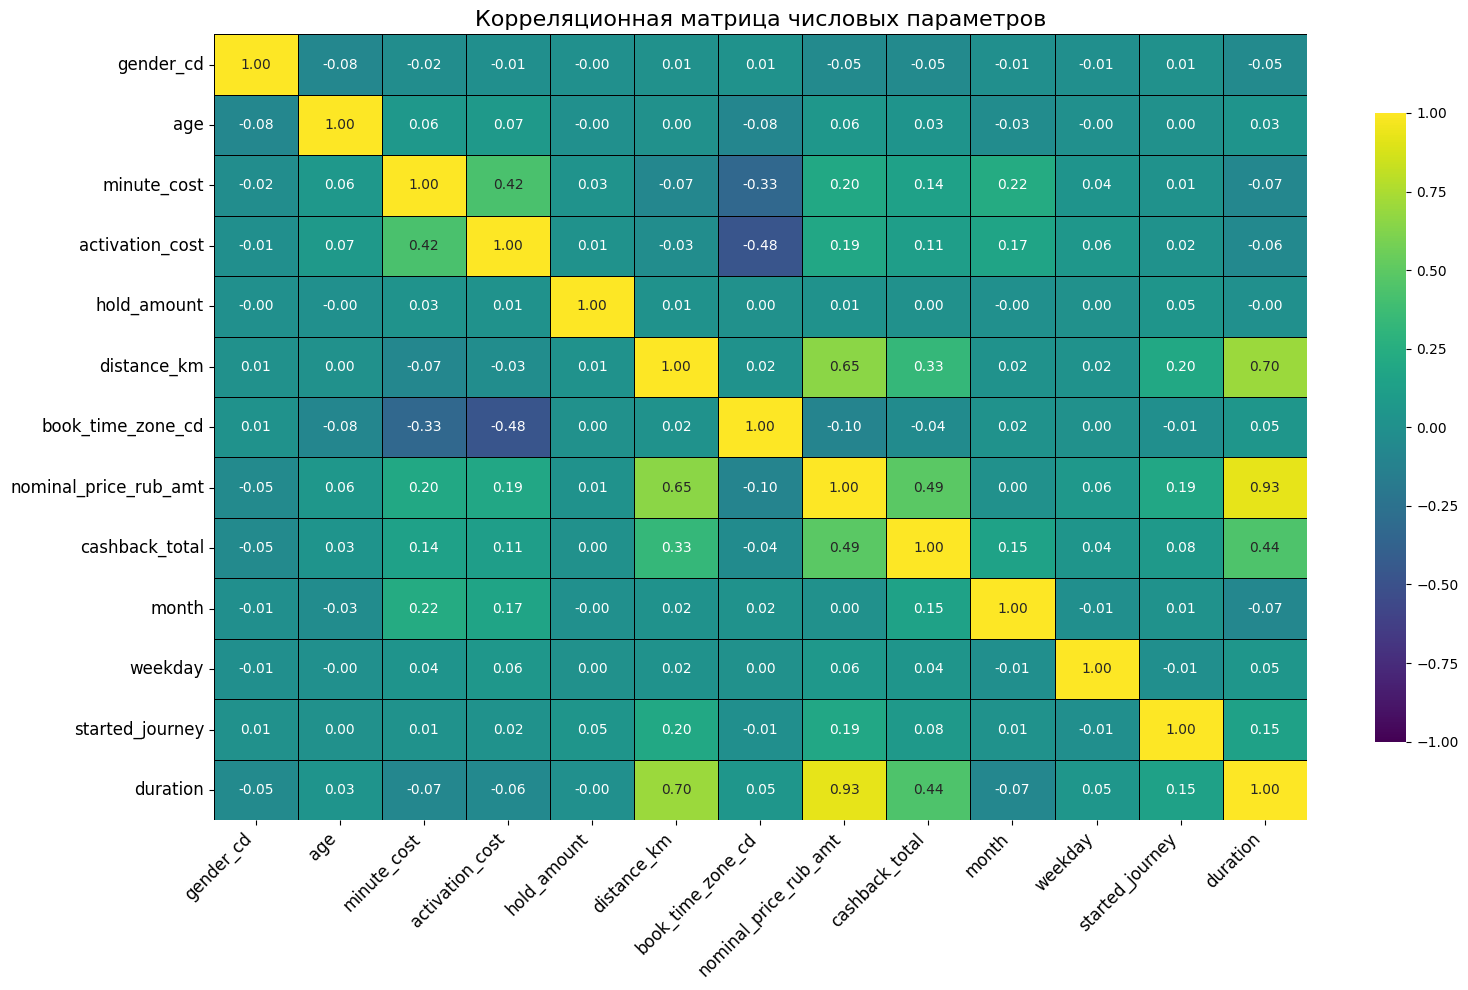

In [20]:
df_numeric = df.select_dtypes(include=['number']).drop(columns=['loyalty_accrual_rub_amt', 'loyalty_accrual_bns_amt', 'order_rk', 'party_rk'])
plt.figure(figsize=(16, 10))

ax = sns.heatmap(
    df_numeric.corr(),
    vmin=-1,
    vmax=1,
    annot=True,
    fmt='.2f',
    cmap='viridis',
    linewidths=0.5,
    linecolor='black',
    cbar_kws={'shrink': 0.8}
)

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)

plt.title('Корреляционная матрица числовых параметров', fontsize=16)
plt.tight_layout()
plt.show()

Проанализировав корреляционную матрицу можно выявить следующие зависимости параметров:


1.   Стоимость минуты положительно коррелирует с ценой активации поездки (коэффициент корреляции 0,42). Это вероятно отражает структурную ценовую согласованность: например, в регионах с более высокой ценовой планкой все компоненты тарифа дороже из-за единых экономических условий и ценовой политики.
2.   Стоимость активации поездки отрицательно коррелирует с часовым поясом (коэффициент корреляции -0,48). Это логично объясняется географически обусловленной ценовой дифференциацией: по мере смещения к востоку (рост значения часового пояса) покупательная способность и спрос снижаются, а тарифы более дешевые.
3. Положительная корреляция между пройденной дистанцией и ценой поездки (коэффициент корреляции 0,65), что в целом очевидно.
4. Положительная корреляция между ценой и общей суммой кэшбека (коэффициент корреляции 0,49) указывает на пропорциональную стратегию лояльности: при более высокой стоимости поездки пользователю выплачивается больший кэшбек.
5. Положительная корреляция между пройденной дистанцией и длительностью поездки (коэффициенты корреляции 0,7 и 0.93 соответственно), а также с ценой поездки, неудивительно, так как это тесно связанные параметры.

В целом, мы не выявили никаких неожиданных корреляций.


Посмотрим на распределение числа поездок по регионам, но для этого нужно стандартизировать название региона в колонке lvn_state_nm. Поездки без данных о регионе не будем учитывать.

In [21]:
def clean(column):
  if pd.notna(column):
    if 'РЕСП' in column and 'РЕСПУБЛИКА' not in column:
      return column.replace('РЕСП', 'РЕСПУБЛИКА')
    elif "ОБЛ" in column and "ОБЛАСТЬ" not in column:
      return column.replace('ОБЛ', "ОБЛАСТЬ")
    elif "Г " in column:
      return column.replace('Г ', "")
    else:
      return column
  else:
    return column

In [22]:
df['lvn_state_nm'] = df['lvn_state_nm'].apply(clean)

df_location = df[['lvn_state_nm', 'order_rk']]
df_location = df_location.groupby('lvn_state_nm')['order_rk'].count().sort_values(ascending=False).reset_index()
df_location.rename(columns={'order_rk': 'count_trips'}, inplace=True)
threshold = 0.01*df_location['count_trips'].sum()  # регионы с менее чем 1% поездок объединим в одну ячейку
df_location.loc[df_location['count_trips'] < threshold, 'lvn_state_nm'] = 'ДРУГИЕ РЕГИОНЫ'
df_location = df_location.groupby('lvn_state_nm')['count_trips'].sum().sort_values(ascending=False).reset_index()
df_location.head(5)

,lvn_state_nm,count_trips
0,МОСКВА,91014
1,ДРУГИЕ РЕГИОНЫ,56417
2,МОСКОВСКАЯ ОБЛАСТЬ,39449
3,САНКТ-ПЕТЕРБУРГ,37060
4,СВЕРДЛОВСКАЯ ОБЛАСТЬ,28438


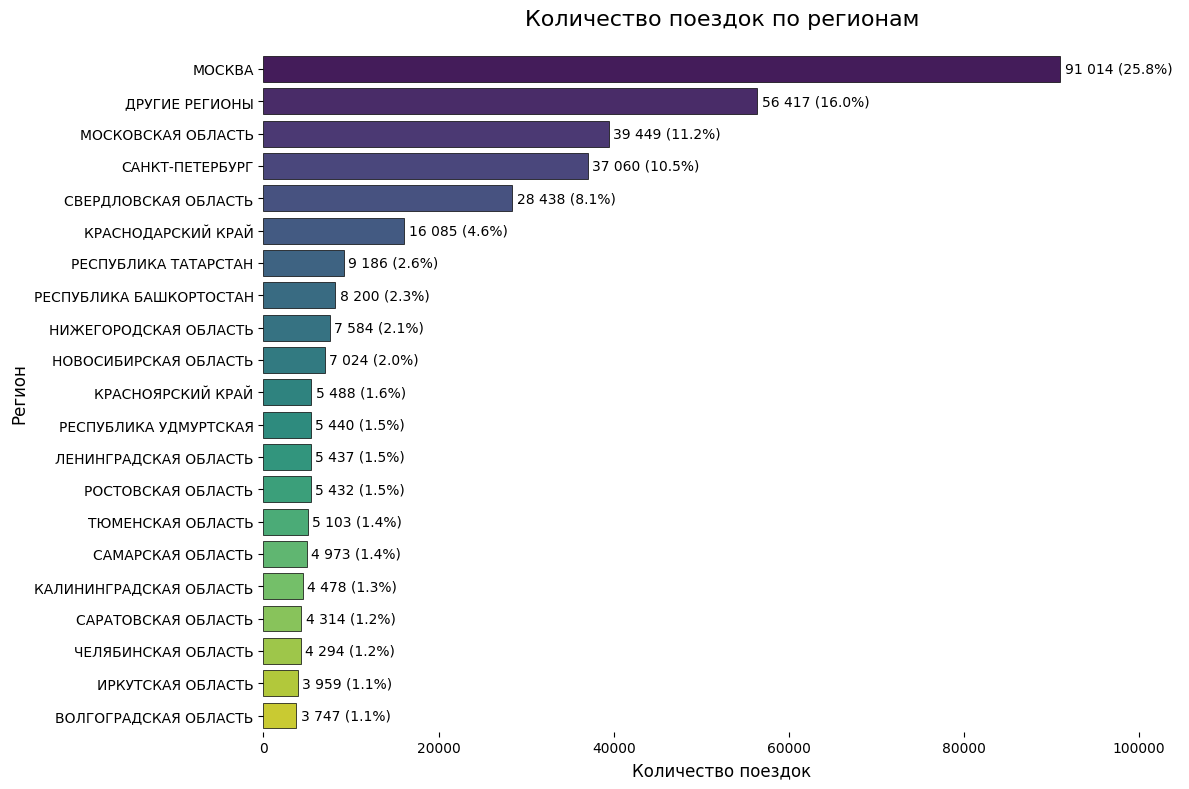

In [23]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    data=df_location,
    x='count_trips',
    y='lvn_state_nm',
    palette='viridis',
    edgecolor='black',
    linewidth=0.5
)
total_trips = df_location['count_trips'].sum()
for p in ax.patches:
    width = p.get_width()
    percentage = (width / total_trips) * 100
    plt.text(
        width + 500,
        p.get_y() + p.get_height() / 2,
        f'{int(width):,} ({percentage:.1f}%)'.replace(',', ' '),
        ha='left',
        va='center',
        fontsize=10
    )

plt.title('Количество поездок по регионам', fontsize=16, pad=20)
plt.xlabel('Количество поездок', fontsize=12)
plt.ylabel('Регион', fontsize=12)
plt.xlim(0, df_location['count_trips'].max() * 1.15)

sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

Нетрудно заметить, что на Москву приходится 25% всех поездок и примерно по 10% на Московкую область, Санкт-Петербург и Свердловскую область. Это неудивительно, так как в этих регионах проживает большое количество людей. Интересно будет посмотреть сколько поездок в месяц приходится на 1000 человек в каждом из представленных ниже 20 регионов.

Соберем данные о населении регионов из [Росстата](http://ssl.rosstat.gov.ru/storage/mediabank/BUL_MO_2024.xlsx) за 2024 год или близжайший год, за который есть данные (для 20 регионов это можно сделать вручную, без парсинга).

In [24]:
n_months = len(df['month'].value_counts())
regions_population = {
    'МОСКВА': 13150,
    'ДРУГИЕ РЕГИОНЫ': np.nan,
    'МОСКОВСКАЯ ОБЛАСТЬ': 8651,
    'САНКТ-ПЕТЕРБУРГ': 5598,
    'СВЕРДЛОВСКАЯ ОБЛАСТЬ': 4223,
    'КРАСНОДАРСКИЙ КРАЙ': 5833,
    'РЕСПУБЛИКА ТАТАРСТАН': 4003,
    'РЕСПУБЛИКА БАШКОРТОСТАН': 4064,
    'НИЖЕГОРОДСКАЯ ОБЛАСТЬ': 3060,
    'НОВОСИБИРСКАЯ ОБЛАСТЬ': 2790,
    'КРАСНОЯРСКИЙ КРАЙ': 2846,
    'ЛЕНИНГРАДСКАЯ ОБЛАСТЬ': 2036,
    'РЕСПУБЛИКА УДМУРТСКАЯ': 1435,
    'РОСТОВСКАЯ ОБЛАСТЬ': 4153,
    'ТЮМЕНСКАЯ ОБЛАСТЬ': 3891,
    'САМАРСКАЯ ОБЛАСТЬ': 3128,
    'КАЛИНИНГРАДСКАЯ ОБЛАСТЬ': 1034,
    'САРАТОВСКАЯ ОБЛАСТЬ': 2385,
    'ЧЕЛЯБИНСКАЯ ОБЛАСТЬ': 3396,
    'ИРКУТСКАЯ ОБЛАСТЬ': 2331,
    'ВОЛГОГРАДСКАЯ ОБЛАСТЬ': 2454
}
df_location.set_index('lvn_state_nm', inplace=True)
df_location['population'] = pd.Series(regions_population)
df_location.reset_index(inplace=True)

df_location['trips_per_month_people'] = df_location['count_trips'] / (df_location['population'] * n_months)

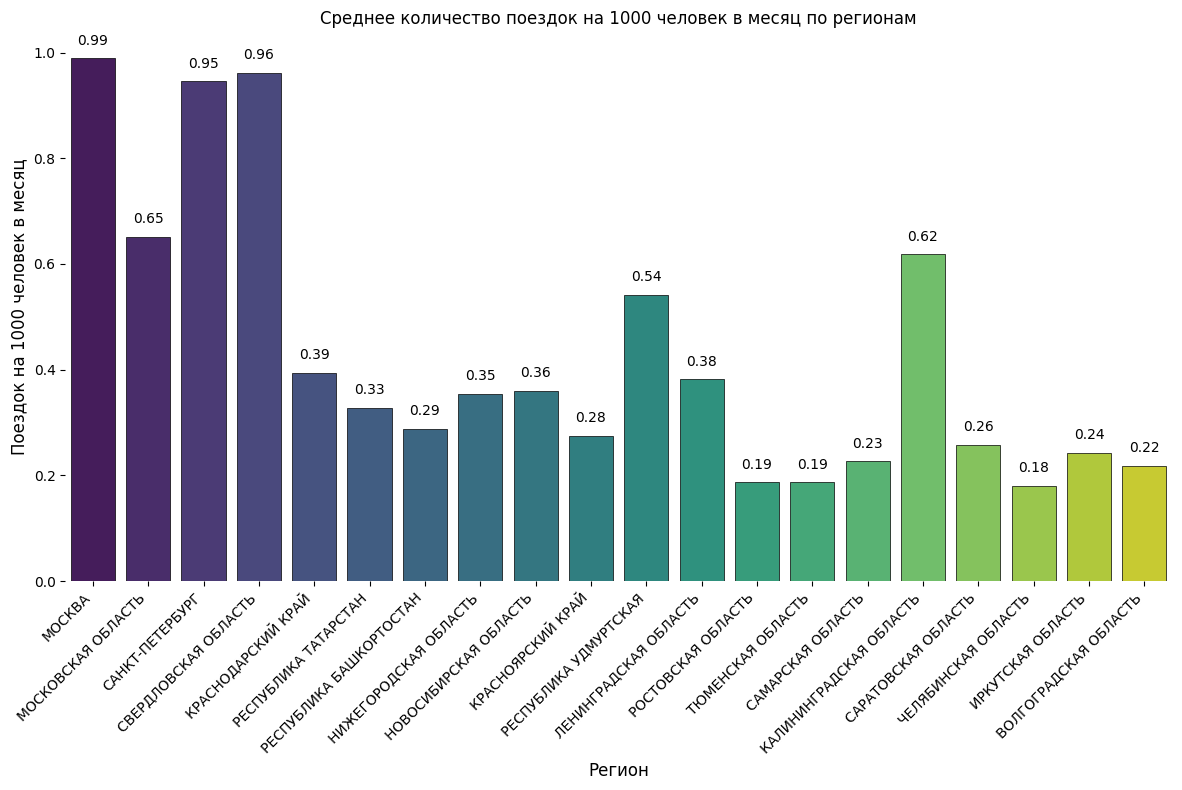

In [25]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    data=df_location[df_location['lvn_state_nm'] != "ДРУГИЕ РЕГИОНЫ"],
    x='lvn_state_nm',
    y='trips_per_month_people',
    palette='viridis',
    edgecolor='black',
    linewidth=0.5
)

for p in ax.patches:
    height = p.get_height()
    if pd.notna(height):
        ax.text(
            p.get_x() + p.get_width() / 2,
            height + 0.02,
            f'{height:.2f}',
            ha='center',
            va='bottom',
            fontsize=10
        )

plt.xticks(rotation=45, ha='right')
plt.xlabel('Регион', fontsize=12)
plt.ylabel('Поездок на 1000 человек в месяц', fontsize=12)
plt.title('Среднее количество поездок на 1000 человек в месяц по регионам')

sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

На гистограмме со средним количеством поездок за месяц на 1000 населения (что можно интерпретировать как популярность самокатов как вида транспорта) можно заметить некоторые интересные особенности. В Москве, Московской области и Санкт-Петербурге высокие показатели оправданы высоким технологическим развитием регионов. Но есть несколько не настолько технологичных регионов, в которых тем не менее самокаты удивительно популярны, это регионы:


*   Свердловская область (0.96 - второе место по популярности самокатов после Москвы)
*   Калининградская область (0.62)
*   Республика Удмуртская (0.54)

Посмотрим на долю в выручке каждого из 6 упомянутых регионов.

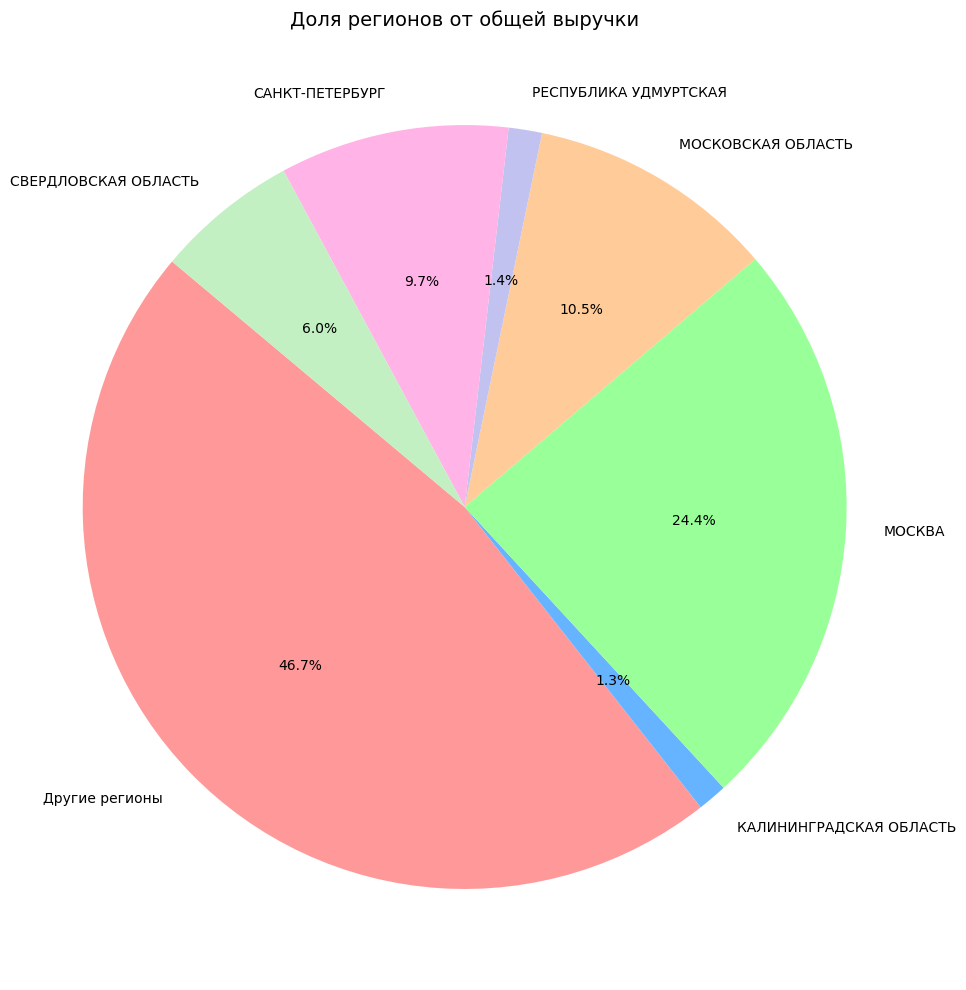

In [26]:
regions = ['МОСКВА', "МОСКОВСКАЯ ОБЛАСТЬ", "САНКТ-ПЕТЕРБУРГ",
           "СВЕРДЛОВСКАЯ ОБЛАСТЬ", "РЕСПУБЛИКА УДМУРТСКАЯ", "КАЛИНИНГРАДСКАЯ ОБЛАСТЬ"]
df['region_grouped'] = df['lvn_state_nm'].apply(lambda x: x if x in regions else 'Другие регионы')
region_revenue = df.groupby('region_grouped')['nominal_price_rub_amt'].sum()

pastel_colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#c2f0c2']
plt.figure(figsize=(10, 10))
plt.pie(
    region_revenue,
    labels=region_revenue.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=pastel_colors[:len(region_revenue)]
)
plt.title('Доля регионов от общей выручки', fontsize=14)
plt.axis('equal')
plt.tight_layout()
plt.show()

df.drop(columns=['region_grouped'], inplace=True)

Попробуем проанализировать половозрастную группу пользователей.

In [27]:
df['gender_cd'].value_counts(normalize=True).reset_index()

,gender_cd,proportion
0,1,0.85
1,0,0.15


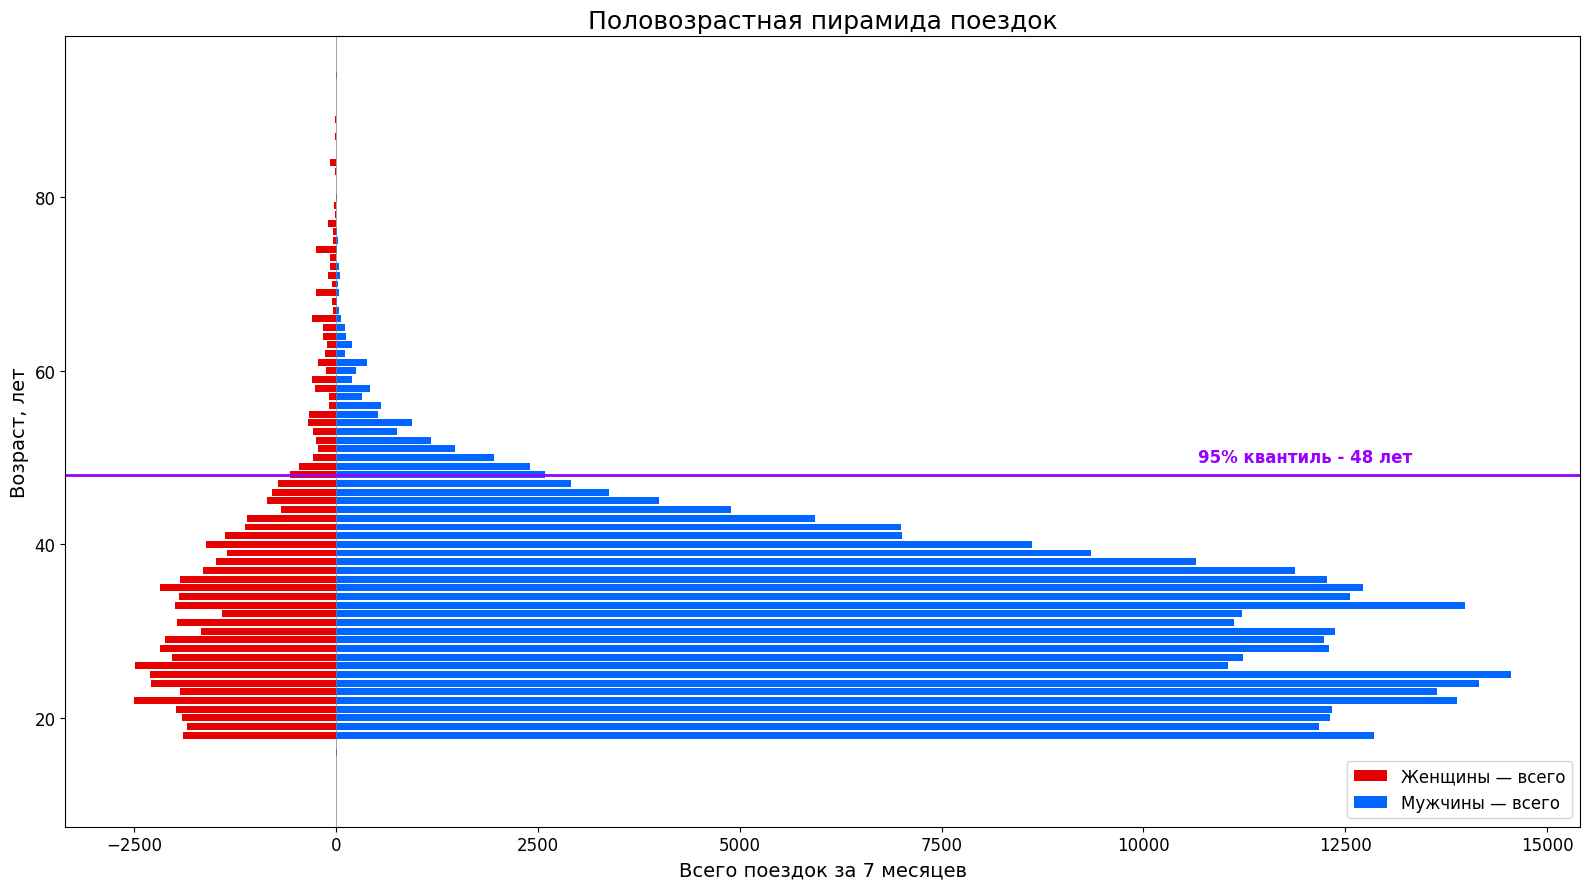

95% поездок совершают пользователи возрастом до 48 лет


In [28]:
age_quan = int(np.quantile(df['age'].to_list(), 0.95))

age_gender_counts = df.groupby(['age', 'gender_cd']).size().unstack(fill_value=0)
age_gender_monthly = age_gender_counts / n_months  # 7 месяцев

age_gender_counts[0] *= -1
age_gender_monthly[0] *= -1
ages = age_gender_counts.index.sort_values()

plt.figure(figsize=(16, 9))
ax = plt.gca()
ax.barh(ages, age_gender_counts.loc[ages, 0], color='#e60000', label='Женщины — всего')
ax.barh(ages, age_gender_counts.loc[ages, 1], color='#0066ff', label='Мужчины — всего')

ax.set_xlabel('Всего поездок за 7 месяцев', fontsize=14)
ax.set_ylabel('Возраст, лет', fontsize=14)
ax.set_title('Половозрастная пирамида поездок', fontsize=18)
ax.axvline(0, color='gray', linewidth=0.5)
ax.axhline(age_quan, color='#9900ff', linewidth=2)
ax.text(
    x=12000,
    y=age_quan + 1,
    s=f'95% квантиль - {age_quan} лет',
    ha='center',
    va='bottom',
    fontsize=12,
    color='#9900ff',
    fontweight='bold'
)

ax.legend(loc='lower right', fontsize=12)
ax.tick_params(labelsize=12)

plt.tight_layout()
plt.show()

print(f'95% поездок совершают пользователи возрастом до {age_quan} лет')

Диаграмма имеет более толстый правый конец, чем у типичной половозврастной диаграммы, значит мужчины ездят на самокатах намного чаще (85% поездок совершают мужчины).

Теперь чуть подробнее проанализируем самые популярные среди самокатчиков регионы и их половозрастную структуру. Посмотрим через призму выручки для компании: для каждого региона и половозрастной группы посчитаем долю этой группы в выручке региона. Также для наглядности посмотрим на долю выручки каждого из упомянутых регионов на круговой диаграмме.


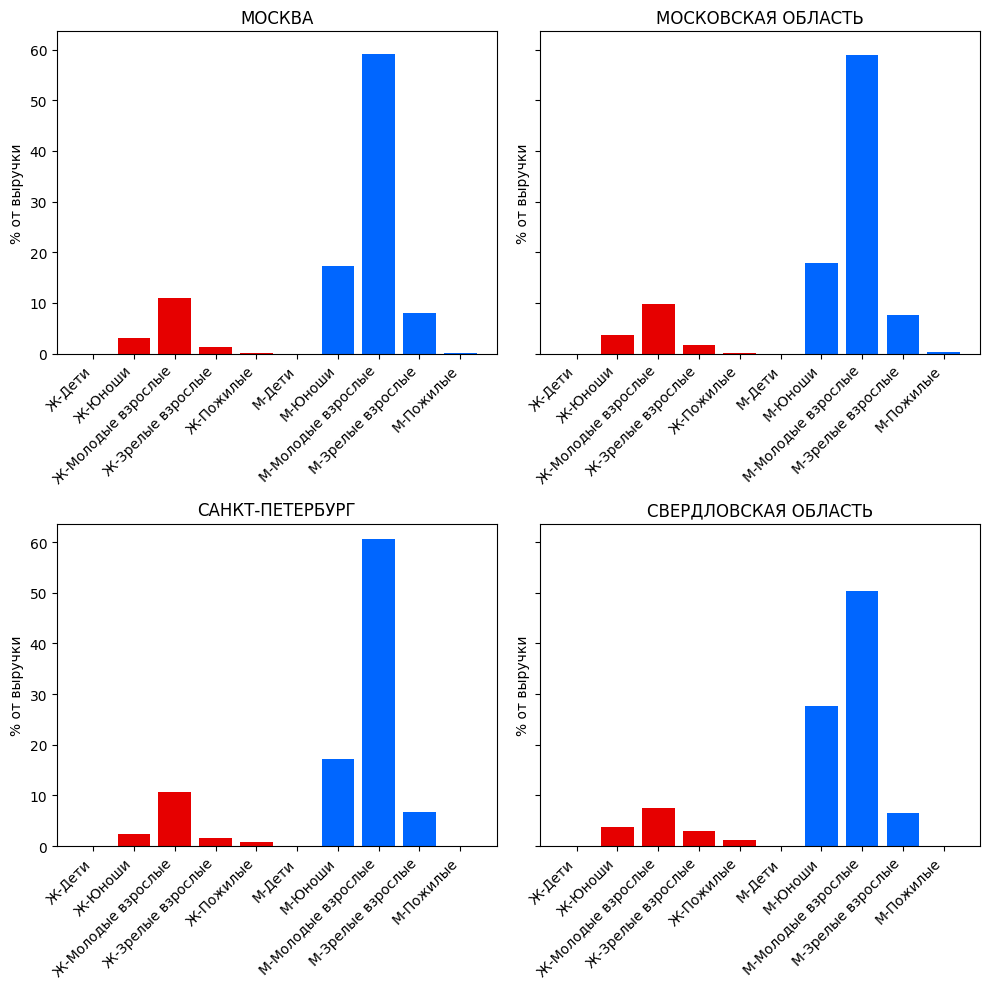

In [29]:
regions = ['МОСКВА', "МОСКОВСКАЯ ОБЛАСТЬ", "САНКТ-ПЕТЕРБУРГ",
           "СВЕРДЛОВСКАЯ ОБЛАСТЬ", "РЕСПУБЛИКА УДМУРТСКАЯ", "КАЛИНИНГРАДСКАЯ ОБЛАСТЬ"]
age_labels = ['Дети', 'Юноши', 'Молодые взрослые', 'Зрелые взрослые', 'Пожилые']
group_labels = [f'Ж-{age}' for age in age_labels] + [f'М-{age}' for age in age_labels]
colors = ['#e60000'] * 5 + ['#0066ff'] * 5

fig, axes = plt.subplots(2, 2, figsize=(10, 10), sharey=True)
axes = axes.flatten()

for i, region in enumerate(regions[:4]):
    ax = axes[i]
    df_region = df[df['lvn_state_nm'] == region]

    total_revenue = df_region['nominal_price_rub_amt'].sum()
    values = []
    for gender in [0, 1]:
        for age in age_labels:
            revenue = df_region[
                (df_region['gender_cd'] == gender) &
                (df_region['age_group'] == age)
            ]['nominal_price_rub_amt'].sum()
            values.append(revenue / total_revenue * 100 if total_revenue > 0 else 0)

    ax.bar(range(10), values, color=colors)
    ax.set_title(region)
    ax.set_xticks(range(10))
    ax.set_xticklabels(group_labels, rotation=45, ha='right')
    ax.set_ylabel('% от выручки')

plt.tight_layout()
plt.show()


В каждом из этих регионов примерно одинаковая структура как по полу, так и по возрасту.

Посмотрим на поездки, которые начались, притом пользователь не проехал ни единого метра. Вероятно, у него возникли некоторые проблемы с регистрацией, произошел сбой, или самокат был разряжен. В случае столкновения с подобными проблемами часть пользователей может передумать пользоваться самокатом, и компания потеряет выручку (допустим, таких клиентов половина из тех, кто столкнулся с проблемами).

Эти поездки составляют более 3% от общего числа поездок.

In [30]:
len(df[df['started_journey']==0])*100 / 396749

3.071463318118004

Можем сформулировать первую гипотезу: ***Если мы улучшим интерфейс приложения, добавив визуальные уведомления о низком заряде батареи и улучшим процесс активации самоката (например, через добавление инструкций или подсказок при проблемах с подключением), мы сможем снизить процент незавершенных поездок с 3% до 2,5%. Это приведет к увеличению количества завершенных поездок и повысит общую выручку на 0,25%.***



Проанализируем выручку и длительность в зависимости от разных видов транспорта для региона Москва (приносящий наибольшую выручку), анализ в совокупности по всем регионам имеет не так много смысла, так как часть моделей самокатов могут быть специфичны для конкретного региона, тогда низкая выручка с данной модели может объясняться не отсутствием спроса пользователей, а низкими тарифами в данном регионе. Соответственно, анализ нужно проводить в каждом регионе по отдельности.

In [31]:
df_msk = df[df['lvn_state_nm']=='МОСКВА'].drop(columns=['loyalty_accrual_bns_amt', 'loyalty_accrual_rub_amt'])
models = list(df_msk['transport_model'].unique())  # посмотрим на доли каждой модели самоката в общем числе поездок
print(df_msk['transport_model'].value_counts().reset_index()['count'].sum())
df_msk['transport_model'].value_counts().reset_index()

91014


,transport_model,count
0,SL,77439
1,Max,5549
2,E,4755
3,Urban E-Bike,2715
4,ES200,278
5,ES100,133
6,ES400,85
7,ES-08S,24
8,MK,20
9,Techno,12


Очевидно, что значимую долю занимают только следующие модели: SL, Max, E, Urban E-Bike. Далее рассмотри только их.

In [32]:
from inspect import modulesbyfile
models_msk = ['SL', "Max", "E", 'Urban E-Bike']
df_msk = df_msk[df_msk['transport_model'].isin(models_msk)].reset_index()

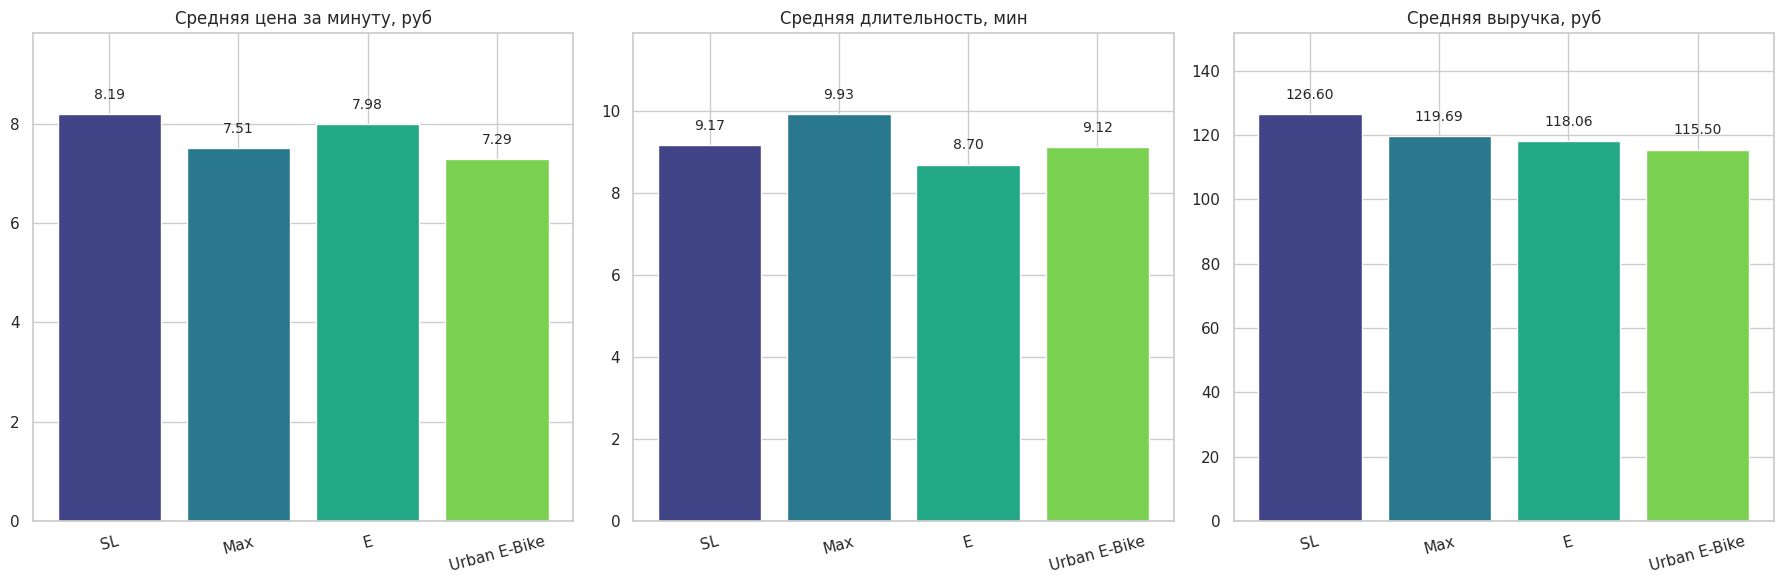

In [33]:
sns.set(style='whitegrid')
metrics = ['minute_cost', 'duration', 'nominal_price_rub_amt']
titles = ['Средняя цена за минуту, руб', 'Средняя длительность, мин', 'Средняя выручка, руб']
grouped = (
    df_msk
    .groupby('transport_model')[metrics]
    .mean()
    .reindex(models_msk)
)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, metric in enumerate(metrics):
    ax = axes[i]
    values = grouped[metric]
    colors = sns.color_palette("viridis", len(values))
    bars = ax.bar(values.index, values.values, color=colors)

    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height + (0.03 * max(values)),
            f'{height:.2f}',
            ha='center',
            va='bottom',
            fontsize=10
        )

    ax.set_title(titles[i])
    ax.set_ylim(0, max(values) * 1.2)
    ax.set_xticks(range(len(models_msk)))
    ax.set_xticklabels(models_msk, rotation=15)

plt.tight_layout()
plt.show()

Проанализировав гистограммы можно выдвинуть гипотезу, что Urban E-Bike является наименее прибыльной моделью сервиса. Выдвинем вторую гипотезу: ***Если самокаты модели Urban E-Bike заменить на модель SL в Москве, то средняя выручка от этих самокатов увеличится на 7,7%, а общая выручка по Москве за сезон вырастет на 0,2%.***

Сформулируем статистические гипотезы:

$H_0$ - средняя выручка за поездку на самокатах модели SL равна средней выручке за поездку на самокатах модели Urban E-Bike

$H_1$ - средняя выручка за поездку на самокатах модели SL больше средней выручке за поездку на самокатах модели Urban E-Bike

$α = 0.05$ - установленный уровень значимости

Покажем, что со статистической значимостью в 5% средняя выручка от данной модели ниже средней выручки от модели SL (наилучшая модель). Для этого используем двухвыборочный T-test Стьюдента и предположение, что выборки независимы. Размер обоих выборок достаточно большой для использования данного критерия.

In [38]:
df_SL = df[(df['transport_model']=='SL') & (df['lvn_state_nm']=='МОСКВА')]['nominal_price_rub_amt'].to_list()
df_Urban = df[(df['transport_model']=='Urban E-Bike') & (df['lvn_state_nm']=='МОСКВА')]['nominal_price_rub_amt'].to_list()

print(f'Размер выборки для группы SL: {len(df_SL)}')
print(f'Размер выборки для группы Urban E-Bike: {len(df_Urban)}')

Размер выборки для группы SL: 77439
Размер выборки для группы Urban E-Bike: 2715


In [39]:
t_stat, p_value = ttest_ind(df_Urban, df_SL, alternative='less', equal_var=False)
print(f"P-значение: {p_value:.3f}")

alpha = 0.05
if p_value < alpha:
    print("Результат статистически значим: средняя выручка от модели Urban E-Bike действительно меньше.")
else:
    print("Нет статистически значимых различий в средней выручке.")

P-значение: 0.000
Результат статистически значим: средняя выручка от модели Urban E-Bike действительно меньше.


С уровнем значимости 5% отвергаем нулевую гипотезу. Рассчитаем возможный эффект на выручку, для этого построим доверительный интервал для разности матожиданий:

In [43]:
x = np.array(df_SL)
y = np.array(df_Urban)
mean_x = x.mean()
mean_y = y.mean()
std_x = x.std(ddof=1)
std_y = y.std(ddof=1)

n_x = len(x)
n_y = len(y)

diff = mean_x - mean_y
se_diff = np.sqrt((std_x**2) / n_x + (std_y**2) / n_y)

deg_freedom = ( (std_x**2 / n_x + std_y**2 / n_y) ** 2 ) / \
     ( ((std_x**2 / n_x)**2) / (n_x - 1) + ((std_y**2 / n_y)**2) / (n_y - 1) )
t_crit = stats.t.ppf(1 - alpha, deg_freedom)

ci_lower = diff - t_crit * se_diff
print(f"Разность средних (SL - Urban E-Bike): {diff:.2f} рублей")
print(f"Нижняя оценка разности матожиданий выручки из 95% доверительного интервала: {ci_lower:.2f} рублей")


Разность средних (SL - Urban E-Bike): 11.10 рублей
Нижняя оценка разности матожиданий выручки из 95% доверительного интервала: 8.96 рублей


По доверительному интервалу понимаем, что разница в средней выручке минимум в 8,96 рублей за поездку. Рассчитаем минимальный эффект:

In [41]:
Urban_rev_change = ci_lower*100 / df_msk[df_msk['transport_model']=='Urban E-Bike']['nominal_price_rub_amt'].mean()
total_rev_change = len(df_msk[df_msk['transport_model']=='Urban E-Bike'])*ci_lower*100 / df_msk['nominal_price_rub_amt'].sum()

print(f'Изменения в выручке для самокатов Urban E-Bike: {Urban_rev_change:.2f}%')
print(f'Изменения в выручке в Москве от замены самокатов модели Urban E-Bike на SL: {total_rev_change:.2f}%')

Изменения в выручке для самокатов Urban E-Bike: 7.76%
Изменения в выручке в Москве от замены самокатов модели Urban E-Bike на SL: 0.21%


Доказали верность второй гипотезы.